<a href="https://colab.research.google.com/github/sophia1kucan/Next.js/blob/main/Stats_CW1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting The Median House Price (Task a)

In [ ]:
#Installing necessary packages and preparing the environment
install.packages('fitdistrplus')
install.packages("dplyr")
install.packages("car")
library(car)
library(readr)
library(ggplot2)
library(fitdistrplus)
library(tidyr)
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘rbibutils’, ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘Rdpack’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’


Loading required package: carData

Loading required package: MASS

Loading required package: survival


Attaching package: ‘dplyr’


The following object is masked from ‘package:MASS’:

    select


The following object is masked from ‘package:car’:

    recode


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




#An overview of the data:


In [ ]:
#Loading the data
data <- read.csv('BostonTrain.csv')

#Providing an overview of the data

str(data)
summary(data$medv)

head(data)

sum(is.na(data))

'data.frame':	404 obs. of  8 variables:
 $ medv   : num  12 19.9 19.4 13.4 18.2 24.6 21.1 24.7 8.7 27.5 ...
 $ crim   : num  15.0234 0.6274 0.0347 7.0504 0.7258 ...
 $ zn     : num  0 0 35 0 0 0 0 85 0 0 ...
 $ rm     : num  5.3 5.83 6.03 6.1 5.73 ...
 $ age    : num  97.3 56.5 23.3 85.1 69.5 14.7 34.5 35.7 100 100 ...
 $ dis    : num  2.1 4.5 6.64 2.02 3.8 ...
 $ ptratio: num  20.2 21 16.9 20.2 21 19.6 20.2 17.3 20.2 20.2 ...
 $ lstat  : num  24.91 8.47 7.83 23.29 11.28 ...


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   16.95   21.60   22.80   26.40   50.00 

,medv,crim,zn,rm,age,dis,ptratio,lstat
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.0,15.02340,0,5.304,97.3,2.1007,20.2,24.91
2,19.9,0.62739,0,5.834,56.5,4.4986,21.0,8.47
3,19.4,0.03466,35,6.031,23.3,6.6407,16.9,7.83
4,13.4,7.05042,0,6.103,85.1,2.0218,20.2,23.29
5,18.2,0.72580,0,5.727,69.5,3.7965,21.0,11.28
6,24.6,0.19186,0,6.431,14.7,5.4159,19.6,5.08


[1] 0

In [ ]:
cor_matrix <- cor(data)
print(cor_matrix)

              medv       crim         zn         rm        age        dis
medv     1.0000000 -0.3800911  0.3095036  0.7106798 -0.3402163  0.2351139
crim    -0.3800911  1.0000000 -0.1988551 -0.2003032  0.3340899 -0.3664869
zn       0.3095036 -0.1988551  1.0000000  0.2746606 -0.5750784  0.6818167
rm       0.7106798 -0.2003032  0.2746606  1.0000000 -0.2108633  0.1982994
age     -0.3402163  0.3340899 -0.5750784 -0.2108633  1.0000000 -0.7565889
dis      0.2351139 -0.3664869  0.6818167  0.1982994 -0.7565889  1.0000000
ptratio -0.4912100  0.2889696 -0.3891631 -0.3426427  0.2408415 -0.2175875
lstat   -0.7364225  0.4141417 -0.3965718 -0.6125767  0.5710511 -0.4949214
           ptratio      lstat
medv    -0.4912100 -0.7364225
crim     0.2889696  0.4141417
zn      -0.3891631 -0.3965718
rm      -0.3426427 -0.6125767
age      0.2408415  0.5710511
dis     -0.2175875 -0.4949214
ptratio  1.0000000  0.3601665
lstat    0.3601665  1.0000000


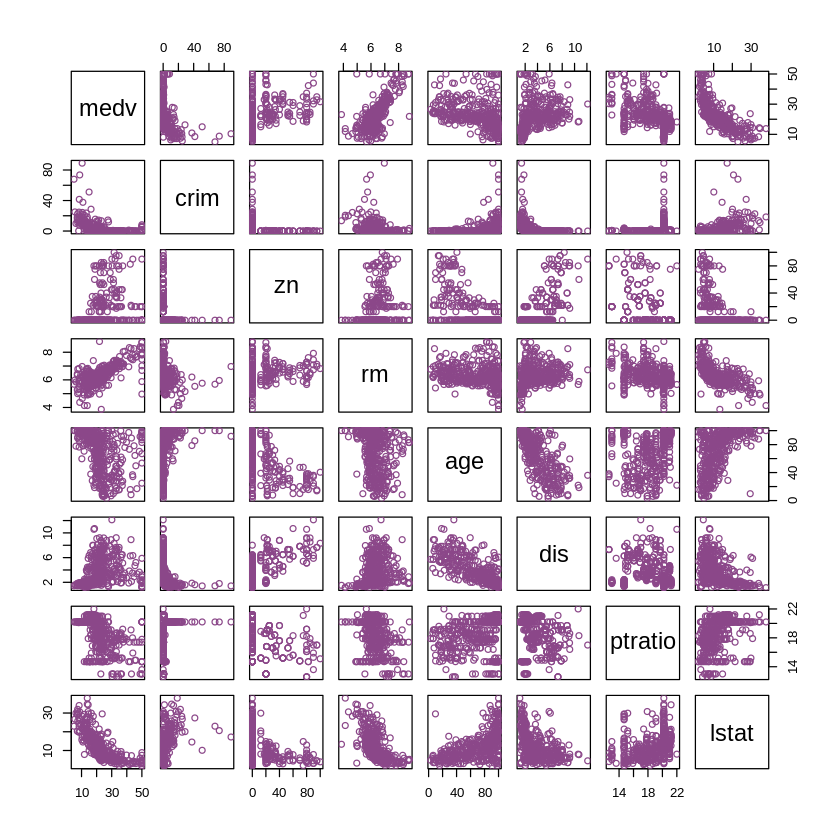

In [ ]:
plot(data[,1:8], col = 'orchid4')

#Comparing each of the variables with Median House Price:

`geom_smooth()` using formula = 'y ~ x'


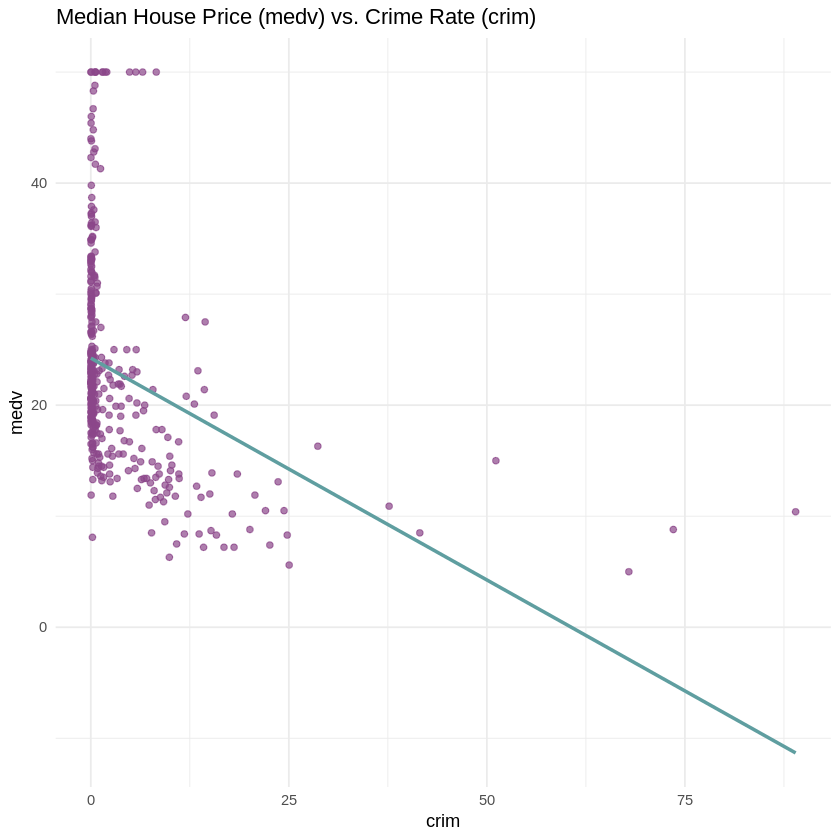

In [ ]:
#Comparing medv with crim
ggplot(data, aes(x = crim, y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Crime Rate (crim)", x = "crim", y = "medv") +
  theme_minimal()

We can see a strong negative correlation between median housing price and crime rate.

There is a large amount of points at crim = 0, suggesting that most neighbourhoods have very low crime rates. In addition there are many high median value house prices at crim = 0, suggesting high income neighbourhoods with low crime rates.

There are some relatively high median value house prices with higher crime rates.

The points to the right of crim = 50 are likely to be high leverage points.
Overall, there are both high leverage points and outliers. A high influence plot would be a good idea to investigate whether these points are worth excluding to preserve model accuracy.

`geom_smooth()` using formula = 'y ~ x'


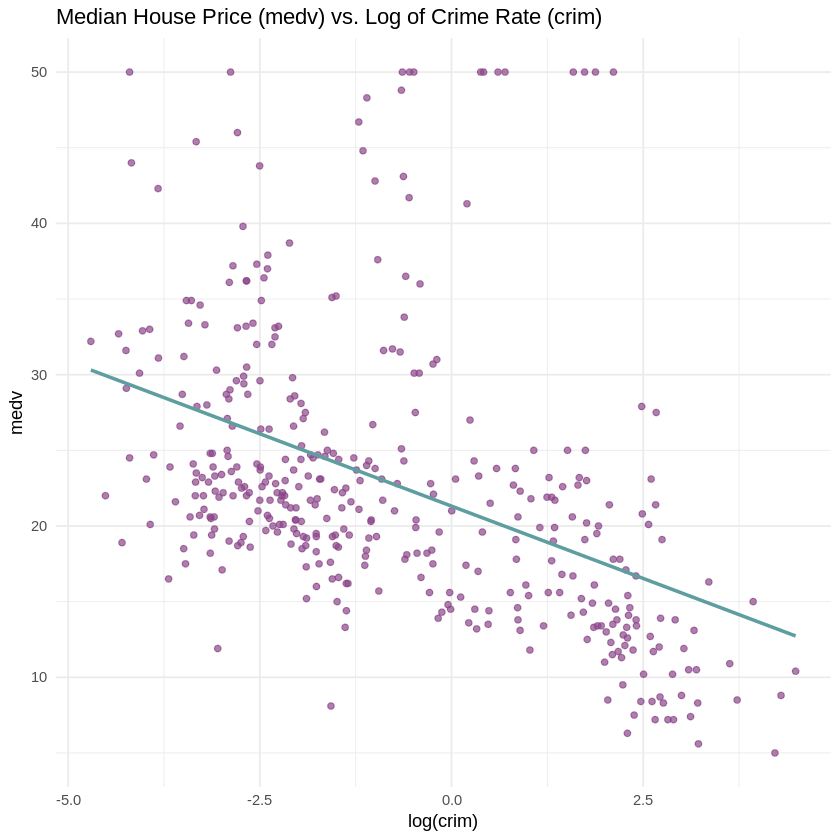

In [ ]:
#Comparing medv with log(crim)
ggplot(data, aes(x = log(crim), y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Log of Crime Rate (crim)", x = "log(crim)", y = "medv") +
  theme_minimal()

In the graph of medv vs log(crim) we can see the scatter plot is more evenly spread.

Compared to the previous plot, the relationship seems more linear and the negative correlation is still present.

There are fewer outliers in this plot, meaning the regression line is more accurate as it is less affected by extreme values.

Overall, log(crim) is likely to produce more accurate predictions than just crim.

`geom_smooth()` using formula = 'y ~ x'


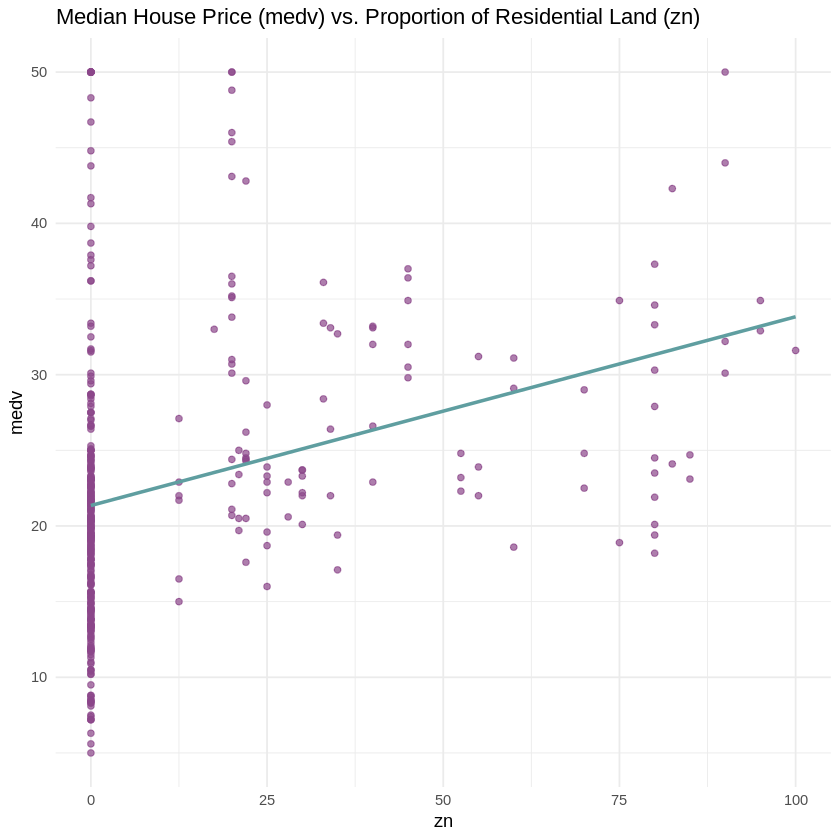

In [ ]:
#Comparing medv with zn
ggplot(data, aes(x = zn, y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Proportion of Residential Land (zn)", x = "zn", y = "medv") +
  theme_minimal()

There is a positive correlation between zn and medv, meaning higher zn values are associated with higher median house prices.

However, the correlation is weak, as we can see the data points are quite widely spread. There are a lot of data points around zn = 0, this suggests there is a large number of houses with no residential land.

The large amount of points at zn = 0 will pull the regression line downwards, affecting the slope.

Since the correlation is relatively weak with a lot of outliers, proportion of residential land is unlikley to be a particularly strong indicator of median house price.

`geom_smooth()` using formula = 'y ~ x'


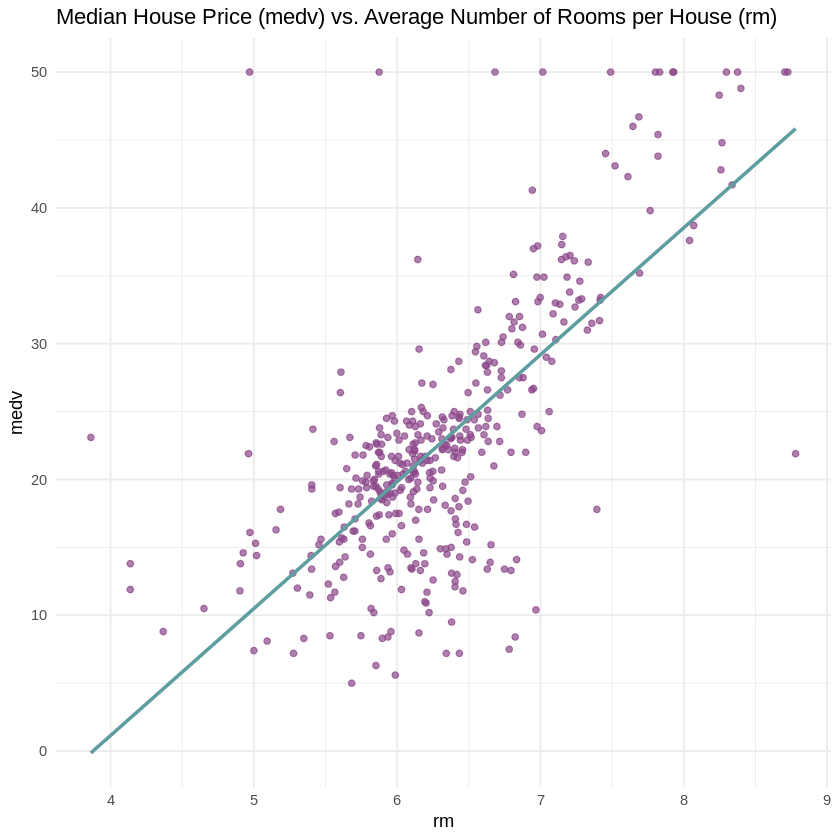

In [ ]:
#Comparing medv with rm
ggplot(data, aes(x = rm, y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Average Number of Rooms per House (rm)", x = "rm", y = "medv") +
  theme_minimal()

We can see a fairly strong positive correlation between median house price and avergage number of rooms, as the number of rooms increases so does the house price.

There is less variability in medv for a given rm, indicating that rm is a relatively accurate predictor for housing prices.

There are some outliers, in particular rm = 8-9 where medv = 50. This could indicate there are some properties worth more than others with the same number of rooms, they could have larger rooms, or be higher quality overall. On the opposite end, there are some points with rm = 6-7 with a medv far below the trend line, around 10-15. This could indicate undervalued or lower quality houses.


`geom_smooth()` using formula = 'y ~ x'


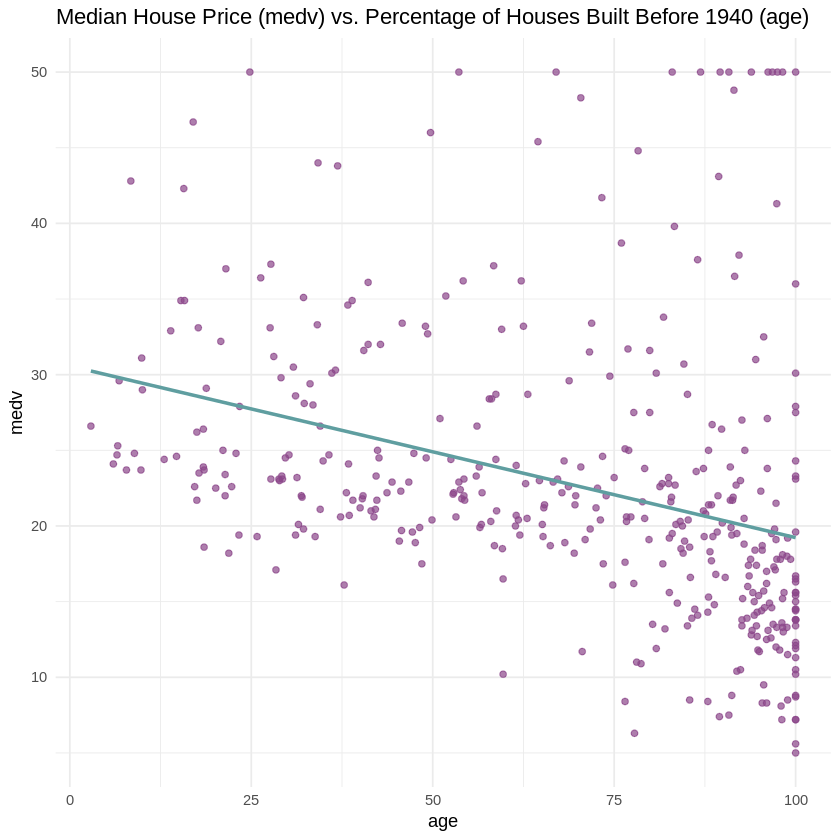

In [ ]:
#Comparing medv with age
ggplot(data, aes(x = age, y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Percentage of Houses Built Before 1940 (age)", x = "age", y = "medv") +
  theme_minimal()

We can see there is some degree of negative correlation between median house price and percentage of houses built before 1940. However, the correlation is fairly weak with a high degree of variability in the house prices at each age level. The spread of points means there are likely other factors that also influence the price of houses and that age alone is unlikely to be an accurate predictor.


`geom_smooth()` using formula = 'y ~ x'


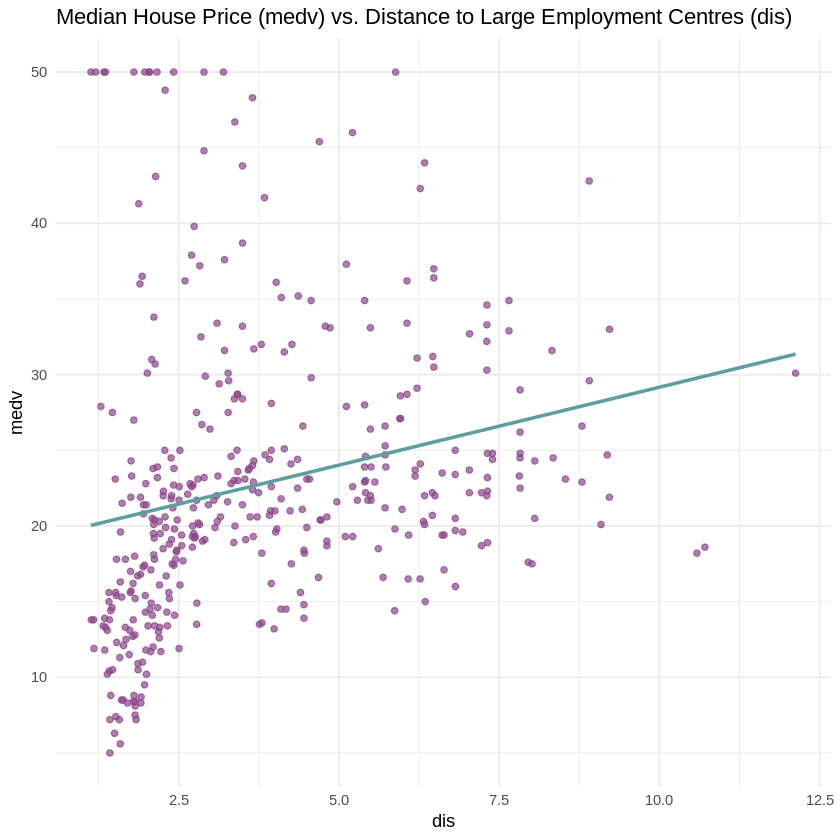

In [ ]:
#Comparing medv with dis
ggplot(data, aes(x = dis, y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Distance to Large Employment Centres (dis)", x = "dis", y = "medv") +
  theme_minimal()

We can see there is a weak positive correlation between median house price and the distance to large employment centres.
Which is unexpected to some extent, as one would expect the houses closer to large employment centres to have much higher prices. For example house prices in the centre of London are much more expensive than the houses on the outskirts.

Most data points are bewteen dis = 1-5. There are many outliers at both small and large distances.

The weak correlation impliesx other factors are likely to be important in predicting house prices.

`geom_smooth()` using formula = 'y ~ x'


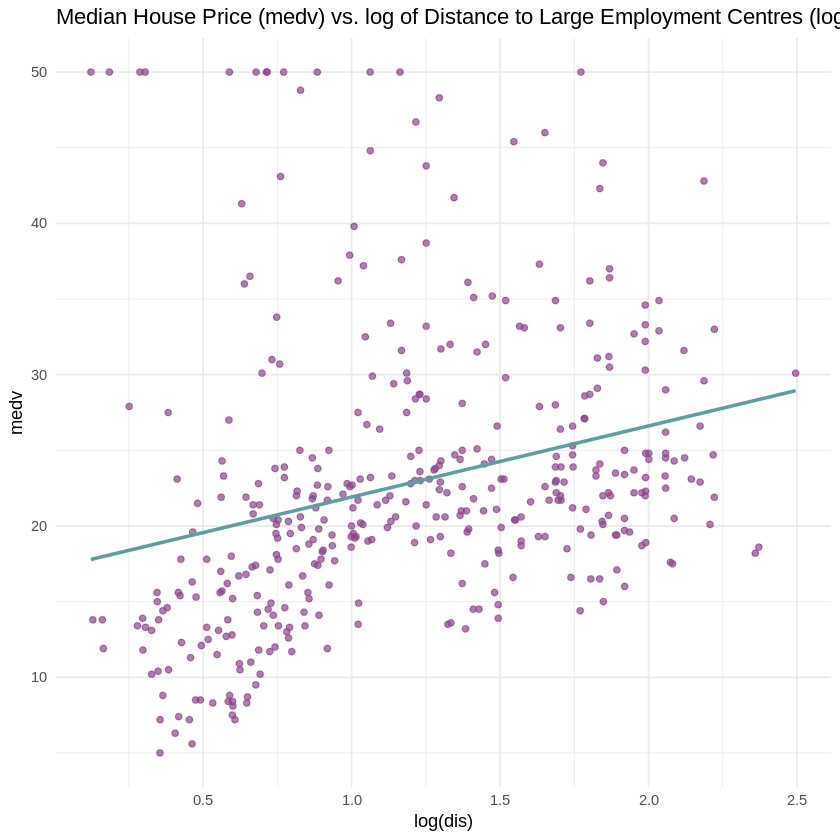

In [ ]:
#Comparing medv with log(dis)
ggplot(data, aes(x = log(dis), y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. log of Distance to Large Employment Centres (log(dis))", x = "log(dis)", y = "medv") +
  theme_minimal()

There is still a weak positive correlation, however compared to the previous plot, in this one the data points are more evenly spread along the x axis. This mean the data is less likely to be skewed than in the raw version.  



`geom_smooth()` using formula = 'y ~ x'


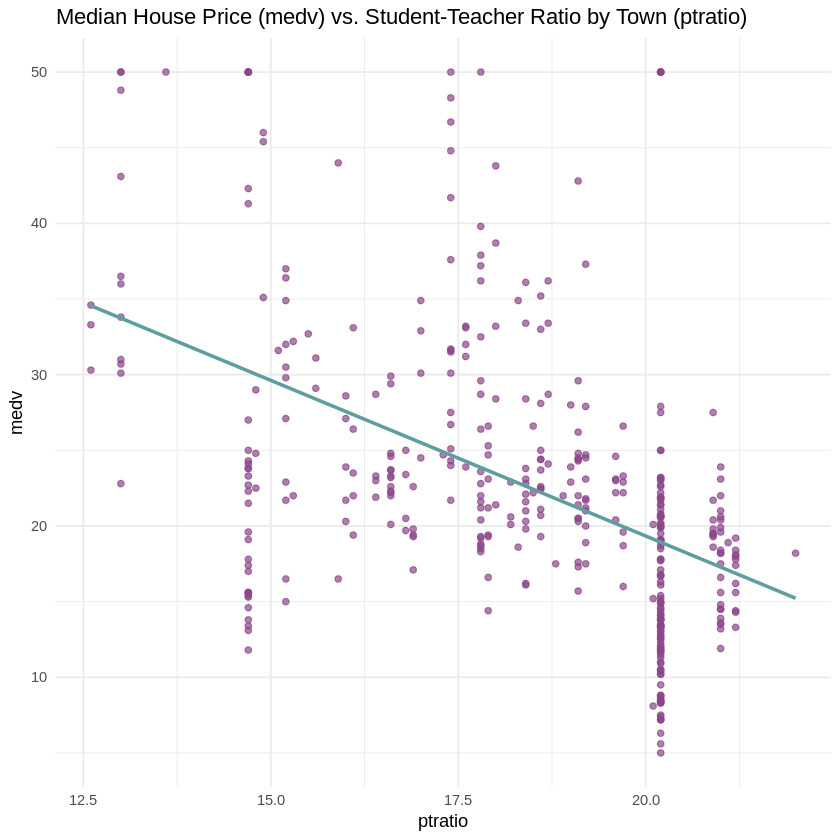

In [ ]:
#Comparing medv with ptratio
ggplot(data, aes(x = ptratio, y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Student-Teacher Ratio by Town (ptratio)", x = "ptratio", y = "medv") +
  theme_minimal()

We can see there is relatively weak correlation between median house price and student-teacher ratio. There is a large amount of outliers especially concentrated around ptratio = 13.6 and ptratio = 20.2.

`geom_smooth()` using formula = 'y ~ x'


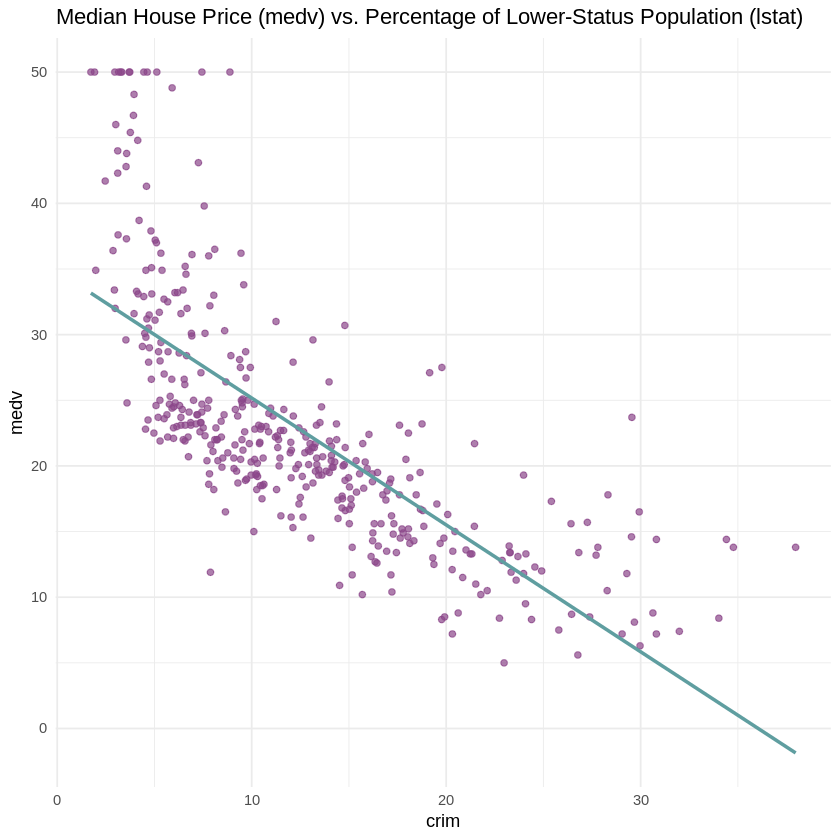

In [ ]:
#Comparing medv with lstat
ggplot(data, aes(x = lstat, y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Percentage of Lower-Status Population (lstat)", x = "crim", y = "medv") +
  theme_minimal()

We can see a fairly strong correlation between median house price and percentage of lower status population.

`geom_smooth()` using formula = 'y ~ x'


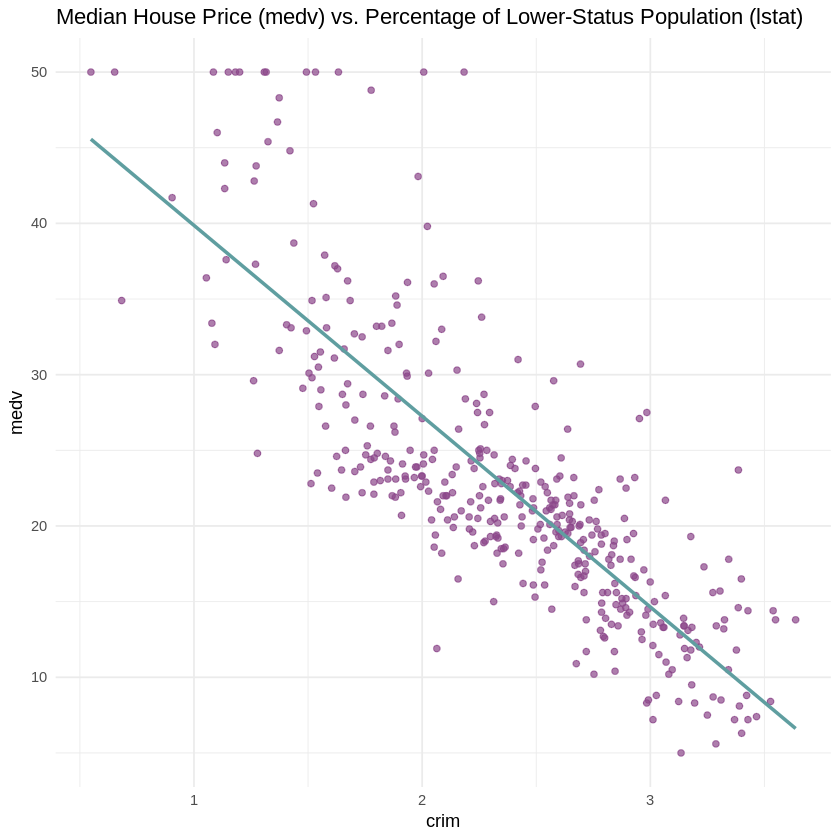

In [ ]:
#Comparing medv with log(lstat)
ggplot(data, aes(x = log(lstat), y = medv)) +
  geom_point(alpha = 0.7, color = "orchid4") +
  geom_smooth(method = "lm", color = "cadetblue", se = FALSE) +
  labs(title = "Median House Price (medv) vs. Percentage of Lower-Status Population (lstat)", x = "crim", y = "medv") +
  theme_minimal()

Taking the log of the percentage of lower status population

#Distribution of the Median House price:

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


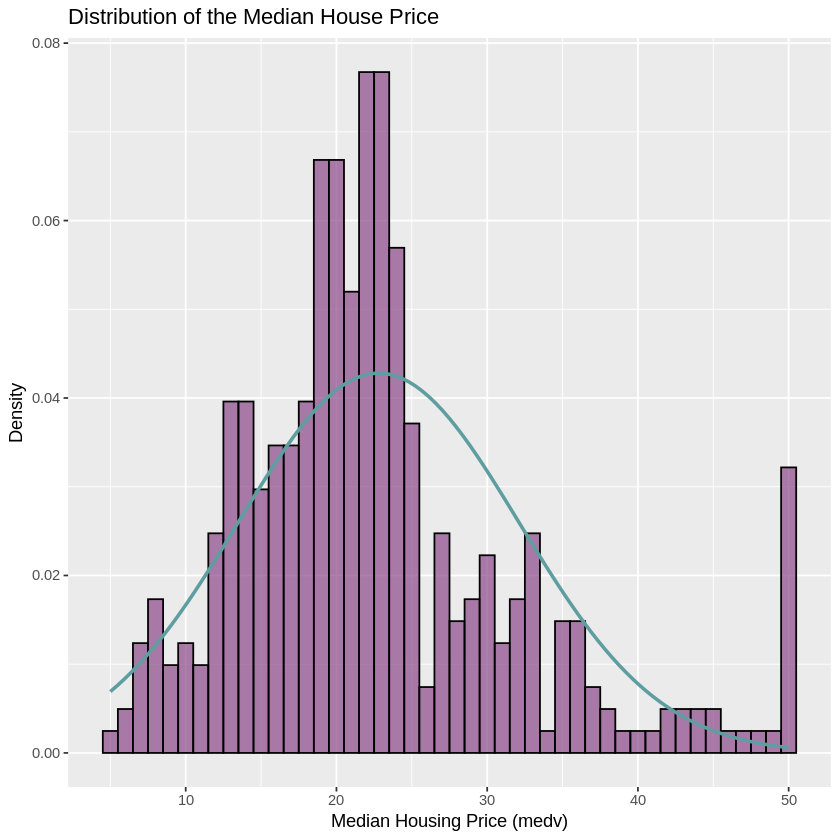

In [ ]:
# Load necessary libraries
library(ggplot2)
library(fitdistrplus)

# Fit a normal distribution to the data
col_data <- data$medv

# Ensure there are no missing values
col_data <- na.omit(col_data)

fit <- fitdist(col_data, 'norm')

mean_fit <- fit$estimate[1]
sd_fit <- fit$estimate[2]

# Convert the column data to a data frame
column_data_df <- data.frame(values = col_data)

# Histogram of the target variable, median housing price
ggplot(column_data_df, aes(x = values)) +
  geom_histogram(aes(y = ..density..), binwidth = 1, fill = 'orchid4', color = 'black', alpha = 0.7) +
  stat_function(
    fun = dnorm,
    args = list(mean = mean_fit, sd = sd_fit),
    color = 'cadetblue',
    size = 1
  ) +
  labs(title = 'Distribution of the Median House Price',
       x = 'Median Housing Price (medv)',
       y = 'Density')

We can see the graph of median house price has a larger tail to the right and the graph is slightly right skewed. Meaning the mean is greater than the mode.


#Fitting a Model:

First looking at a simple linear regression model:


Call:
lm(formula = medv ~ crim + zn + rm + age + dis + ptratio + lstat, 
    data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-16.8835  -2.8867  -0.6322   1.7532  28.1088 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 19.56683    4.47823   4.369 1.59e-05 ***
crim        -0.12486    0.03274  -3.814 0.000159 ***
zn           0.02283    0.01623   1.407 0.160303    
rm           4.76517    0.47254  10.084  < 2e-16 ***
age         -0.02075    0.01494  -1.389 0.165689    
dis         -1.01315    0.21150  -4.790 2.36e-06 ***
ptratio     -0.76083    0.13213  -5.758 1.71e-08 ***
lstat       -0.59899    0.05691 -10.525  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.05 on 396 degrees of freedom
Multiple R-squared:  0.7122,	Adjusted R-squared:  0.7072 
F-statistic:   140 on 7 and 396 DF,  p-value: < 2.2e-16


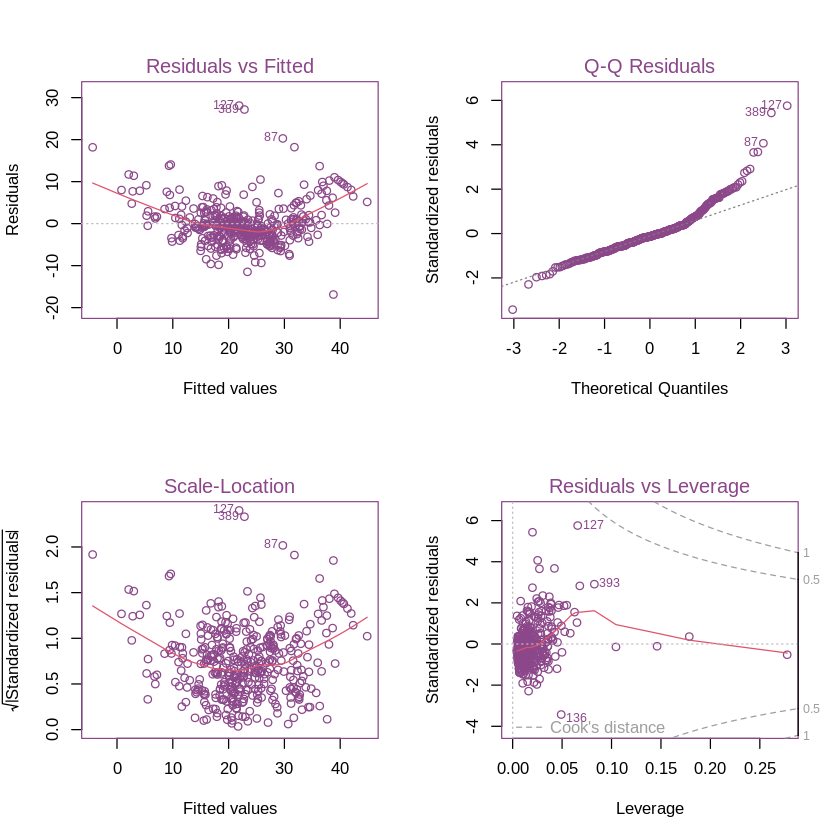

In [ ]:
#Fitting a multiple linear regression model.
model <- lm(medv ~ crim + zn + rm + age + dis + ptratio + lstat, data = data)
summary(model)


#Summary graphs of the linear model.

par(mfrow = c(2,2), col = 'orchid4')
plot(model)

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
21,0.3602133,0.17863667,0.00353525
127,6.0084253,0.06577449,0.29184558
189,-0.5216099,0.27766573,0.01309739
389,5.6407497,0.02006007,0.07553863
393,2.9367488,0.08263465,0.09527548


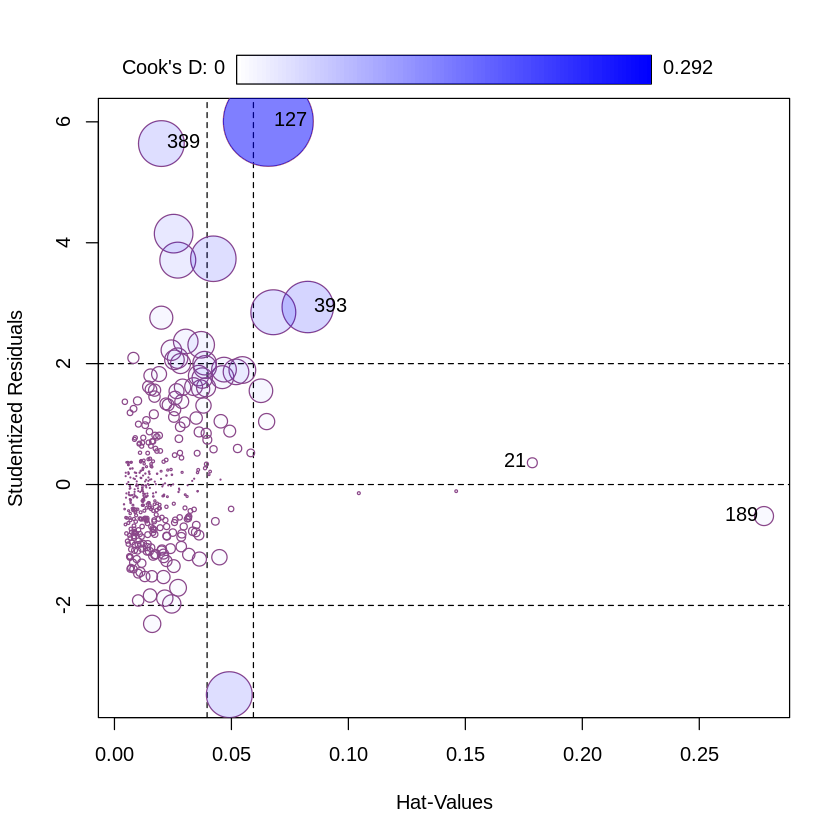

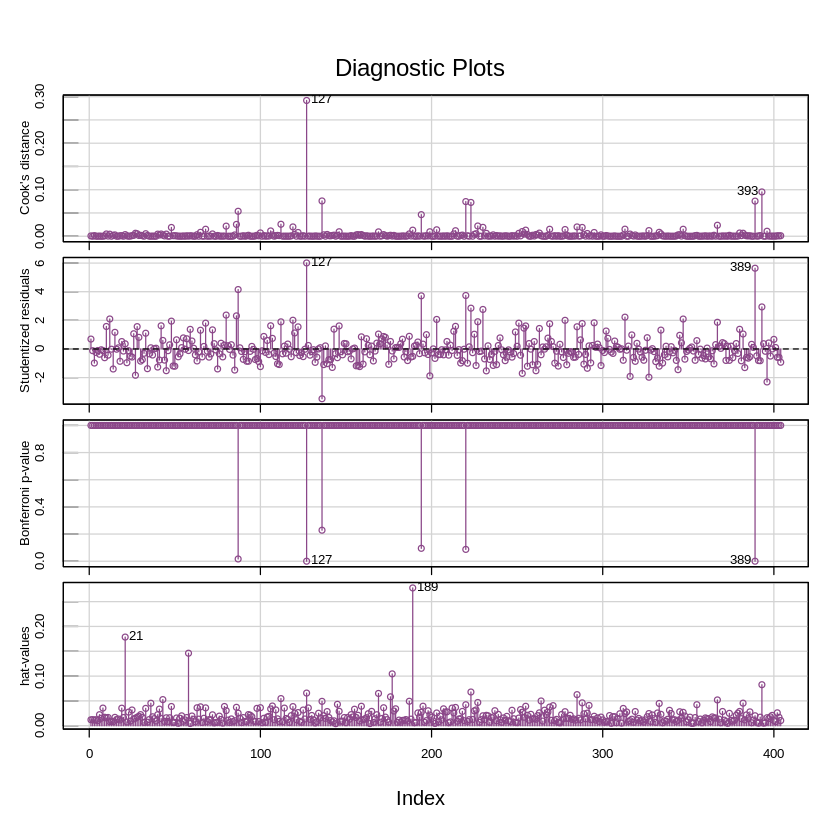

In [ ]:
#Creating influence plots for the model
influencePlot(model, col = 'orchid4')
influenceIndexPlot(model, col = 'orchid4')

We can see that there are several high influence points.

Now creating a linear regression model with some of the variables adjusted according to the earlier analysis:


Call:
lm(formula = medv ~ log(crim) + zn + rm + age + log(dis) + ptratio + 
    log(lstat), data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.822  -2.653  -0.486   2.405  25.687 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.7029355  4.6466265   8.975  < 2e-16 ***
log(crim)   -0.5489955  0.1759381  -3.120  0.00194 ** 
zn          -0.0155000  0.0133581  -1.160  0.24661    
rm           3.3792094  0.4574339   7.387 8.95e-13 ***
age          0.0009841  0.0143407   0.069  0.94532    
log(dis)    -3.7913848  0.8104571  -4.678 3.98e-06 ***
ptratio     -0.7025566  0.1202000  -5.845 1.06e-08 ***
log(lstat)  -9.8531713  0.6585011 -14.963  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.57 on 396 degrees of freedom
Multiple R-squared:  0.7643,	Adjusted R-squared:  0.7601 
F-statistic: 183.5 on 7 and 396 DF,  p-value: < 2.2e-16


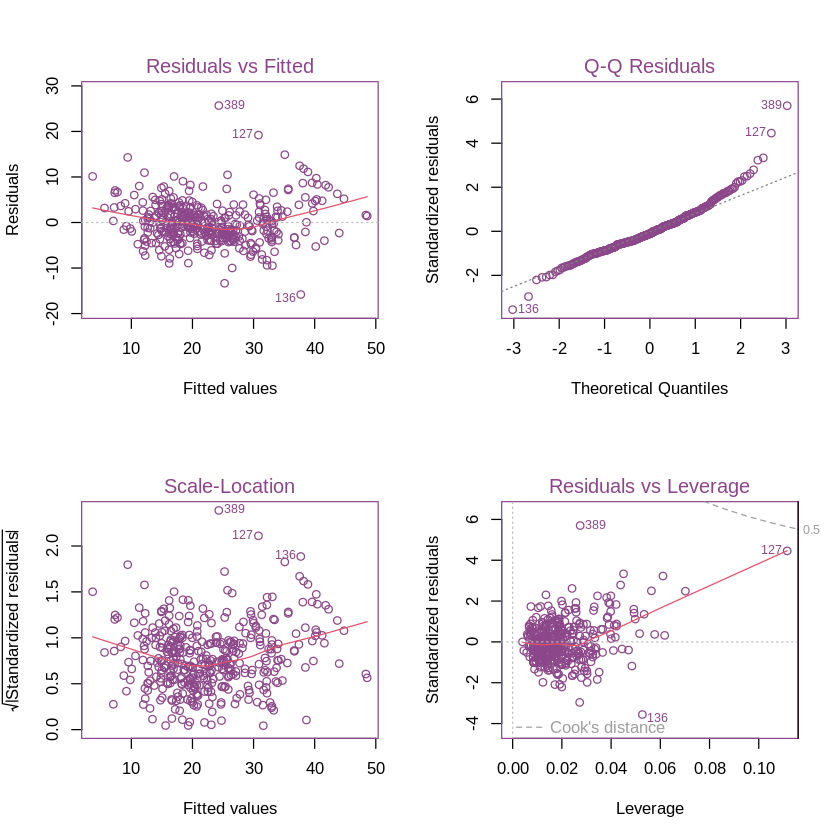

In [ ]:
#Fitting a multiple linear regression model with the adjusted variables.
model_2 <- lm(medv ~ log(crim) + zn + rm + age + log(dis) + ptratio + log(lstat), data = data)
summary(model_2)

#Saving the model for later
save(model_2, file = 'model_2')

#Summary graphs of the linear model.
par(mfrow = c(2,2), col = 'orchid4')
plot(model_2)

,StudRes,Hat,CookD
,<dbl>,<dbl>,<dbl>
127,4.567235,0.11155184,0.31175240
223,2.501050,0.07018707,0.05824932
389,5.940520,0.02743536,0.11452106


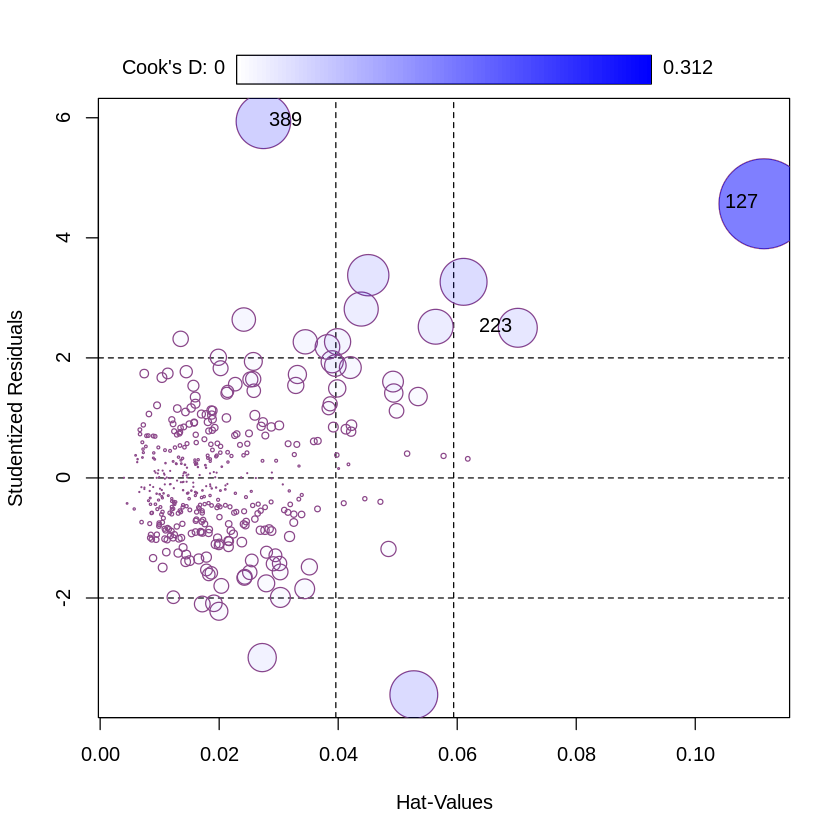

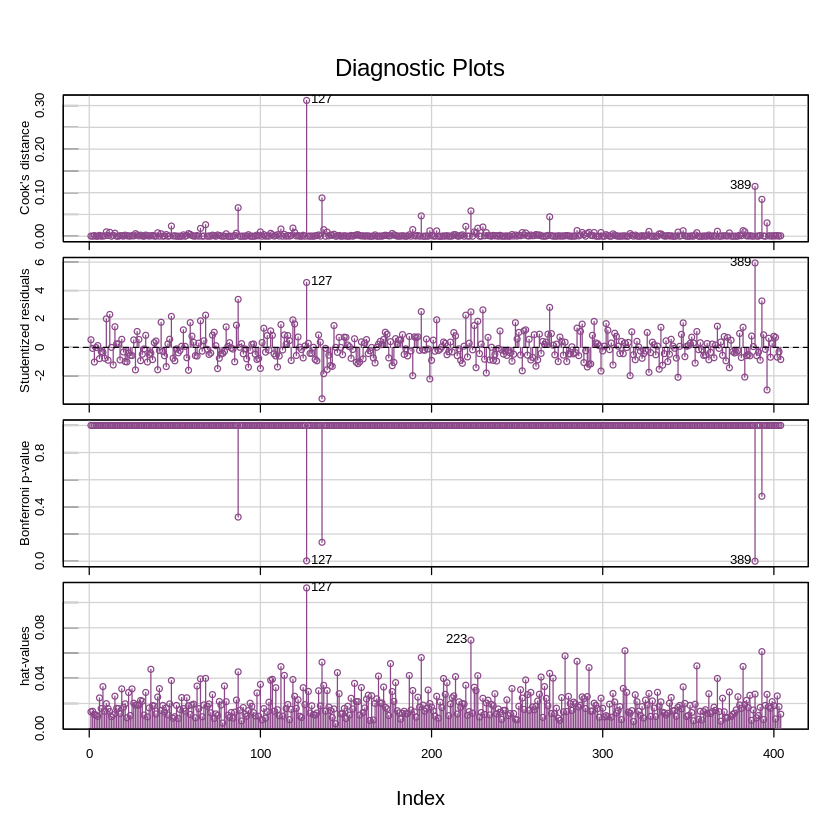

In [ ]:
#Creating influence plots for the second model
influencePlot(model_2, col = 'orchid4')
influenceIndexPlot(model_2, col = 'orchid4')

Again, there is on particularly high influence point.


Creating a null model to compare with the two linear regression models:


Call:
lm(formula = medv ~ 1, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.797  -5.846  -1.196   3.603  27.203 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  22.7965     0.4643    49.1   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.332 on 403 degrees of freedom


hat values (leverages) are all = 0.002475248
 and there are no factor predictors; no plot no. 5



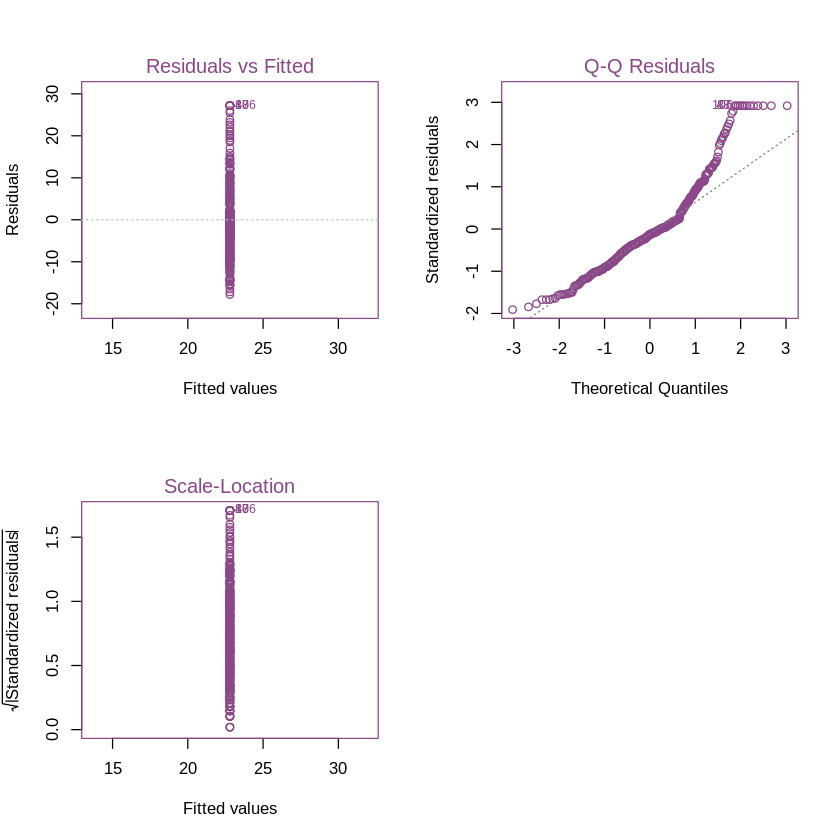

In [ ]:
#Creating a null model
null_model <- lm(medv ~ 1, data)
summary(null_model)
par(mfrow = c(2, 2), col = 'orchid4')
plot(null_model)

#Comparing The Models:

The residual standard error is the variability in the dependent variables not explained by the independent variables. A smaller RSE indidcates the predictions of the model are closer to the actual values and the model explains the variation in the data more effectively. So a smaller RSE indicates a better fitting model.
The RSE in the first multiple linear regression model is 5.05, in the second regression model with the adjusted variables it is 4.57, and in the null model it is 9.332. 4.57 < 5.05 < 9.332. The much larger RSE seen in the null model indicates than in the other two models indicates the null model has a worse fit than the two regression models. The smaller residual standard error seen in the second model indicates the regression line is closer to the data points on average and suggests the second model (with adjusted values) has a better fit. <br><br>

The adjusted R squared value can be interpreted as the proportion of the total variability in median house price accounted for by the model, a higher R squared value is desirable as it indicates a more accurate model. The adjusted R squared value is 0.7072 in the first multiple linear regression model, 0.7601 in the adjusted linear regression model, and 0 for the null model, 0 < 0.7072 < 0.7601.
This suggests that the first model explains a lower proportion of the variance in the median house price than the second (adjusted) model. Meaning in terms of adjusted R squared value, we can conclude our second linear model (with adjusted variable) is a more accurate predictor. <br><br>

The F statistic is a measure of the ratio of two variances, a higher F statistic indicates the predictors are more significantly associated with the median housing price. So for a more accurate model, a higher F statistic is desirable. The F statistic for the first model is 140 and for the second model it is 183.5, 140 < 183.5. This means the predictors for the second (adjusted) model are more significantly associated with the median housing price, indicating the second (adjusted) model is a more accurate model. <br><br>

For the residual vs fitted plot, we want the residual plots to look like the dotted horizontal line (the null plots). Since the second model has its residuals closer
In the first model the line of best fit for the residuals is more strongly curved and thus further from the null plot, whereas the second (adjusted) model has a line of best fit for the residuals more closely resembling the null plot. Meaning in regards to the residual plots, the second (adjusted) model is likely to be a better model.<br><br>

Using a Q-Q plot to check normality, if the data approximately match the straight line representing the reference t-distribution, then the assumption that the data come from the normal distribution is validated. We can see that the Q-Q plot of the second (adjusted) model is closer to the straight than in the first model. Comparing the two Q-Q plots suggests that the second (adjusted) model is a more accurate model.

#Part b

In [ ]:
#Loading the data
data_test <- read.csv('BostonTest.csv')
str(data_test)

'data.frame':	102 obs. of  8 variables:
 $ medv   : num  23.6 32.4 13.6 22.8 16.1 20 17.8 14 19.6 16.8 ...
 $ crim   : num  0.0918 0.0564 0.1057 0.0916 5.0902 ...
 $ zn     : num  0 40 0 0 0 0 0 0 0 0 ...
 $ rm     : num  6.42 6.76 5.98 6.07 6.3 ...
 $ age    : num  84.1 32.9 98.8 7.8 91.8 74.5 83.2 93.6 90.7 79.7 ...
 $ dis    : num  2.65 4.08 1.87 5.29 2.37 ...
 $ ptratio: num  16.6 17.6 20.1 19.2 20.2 18.7 18.4 21.2 20.2 19.2 ...
 $ lstat  : num  9.04 3.53 18.07 5.52 17.27 ...


The best model from part a was model 2, the linear regression model where some of the variables were adjusted using log().

In [ ]:
#Loading the best model from part a
load('model_2')

#Using the model to make predictions
best_model_predictions <- predict(model_2, data_test)

#Fitting a simple linear regression model
lm_model <- lm(medv ~ lstat, data = data_test)
lm_predictions <- predict(lm_model, data_test)

#Plotting this
#par(mfrow = c(2,2), col = 'orchid4')
#plot(lm_model)

In [ ]:
#Calculating the MSE of our predictions
actuals <- data_test$medv
mse_best <- mean((actuals - best_model_predictions)^2)
mse_lm <- mean((actuals - lm_predictions)^2)

#Calculating the mean absolute error
mae_best <- mean(abs(actuals - best_model_predictions))
mae_lm <- mean(abs(actuals - lm_predictions))

#Caluculating R^2
r2_best <- cor(actuals, best_model_predictions)^2
r2_lm <- cor(actuals, lm_predictions)^2

#Printing the performance metrics caluclated above
cat("Best Model - MSE:", mse_best, "MAE:", mae_best, "R²:", r2_best, "\n")
cat("Linear Model - MSE:", mse_lm, "MAE:", mae_lm, "R²:", r2_lm, "\n")



Best Model - MSE: 21.71038 MAE: 3.120251 R²: 0.7118263 
Linear Model - MSE: 33.00203 MAE: 4.006628 R²: 0.549975 


The best model has a mean squared error (MSE) of 21.71038 whereas the simple linear model has a MSE of 33.00203. 21.7 < 33.0, meaning the predictions in the best model are closer to the actual values than the predictions in the simple linear model, indicating the best model is more accurate.

The best model also has a lower mean absolute error, indicating the best model is more accurate.

The R^2 for the best model is closer to 1 than in the simple linear model. Meaning the best model better explains the variance in medv.

Warning message:
“No shared levels found between `names(values)` of the manual scale and the
data's colour values.”


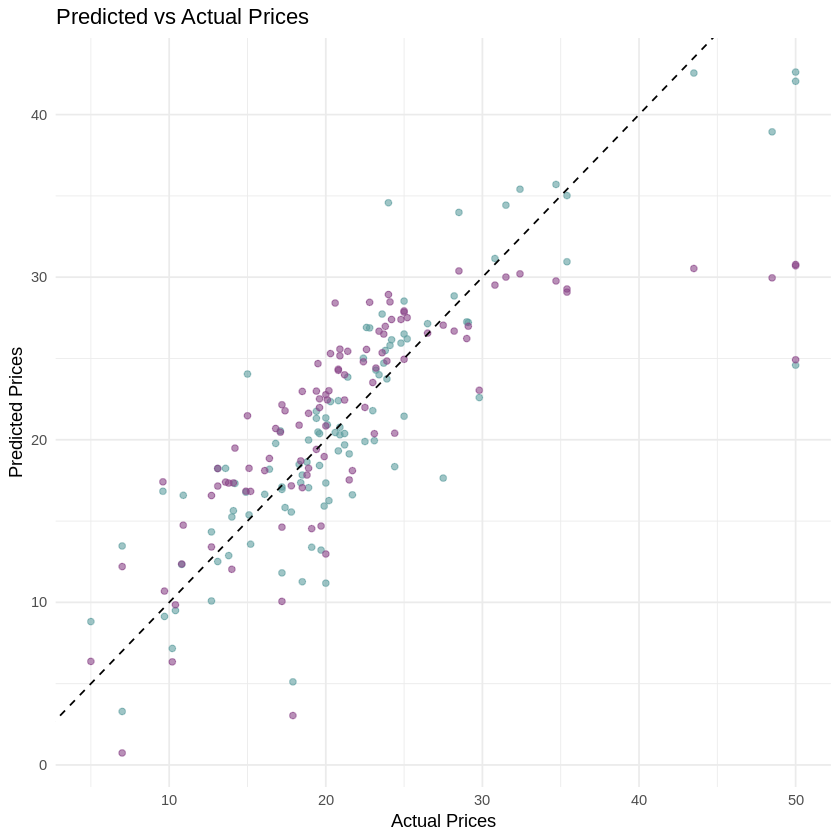

In [ ]:
#Producing a scatter graph of the actual vs predicted values
ggplot() +
  geom_point(aes(x = actuals, y = best_model_predictions), color = "cadetblue", alpha = 0.6) +
  geom_point(aes(x = actuals, y = lm_predictions), color = "orchid4", alpha = 0.6) +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  labs(title = "Predicted vs Actual Prices",
       x = "Actual Prices",
       y = "Predicted Prices") +
  theme_minimal() +
  scale_color_manual(values = c("Best Model" = "cadetblue", "Linear Model" = "orchid4"))



The blue points are the points from the best model and the purple points are from the simple linear model.

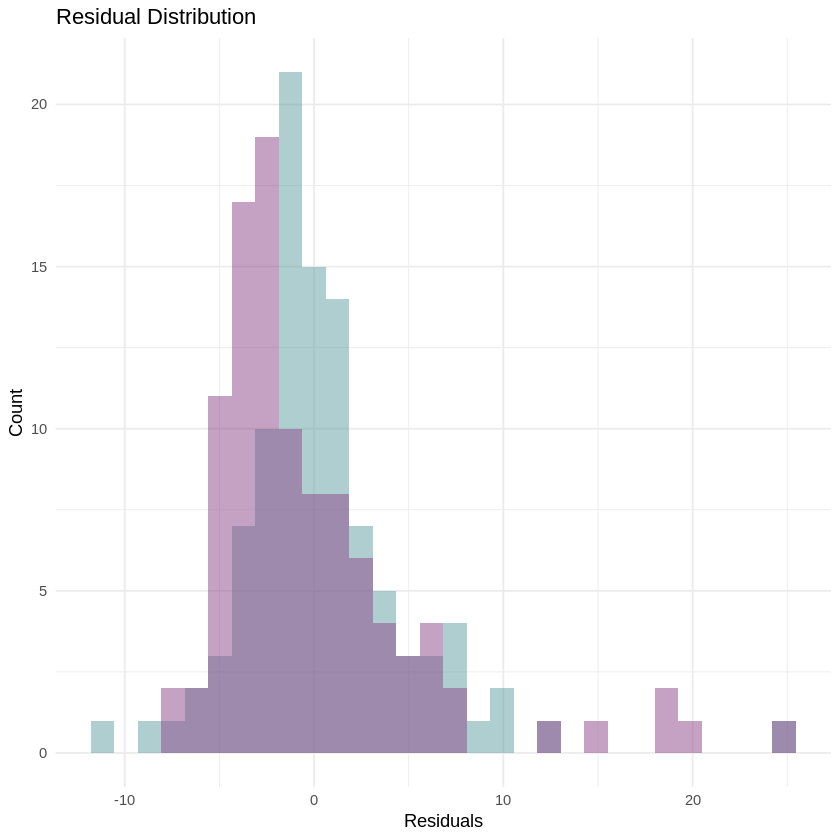

In [ ]:
#Producing a histogram of residuals
residuals_best <- actuals - best_model_predictions
residuals_lm <- actuals - lm_predictions

ggplot() +
  geom_histogram(aes(residuals_best), fill = "cadetblue", alpha = 0.5, bins = 30) +
  geom_histogram(aes(residuals_lm), fill = "orchid4", alpha = 0.5, bins = 30) +
  labs(title = "Residual Distribution", x = "Residuals", y = "Count") +
  theme_minimal()

The residuals should be centred around zero and normally distributed.

The residuals have a slightly skewed shape, indicating the model might not be capturing the realtionship correctly.

Some of the residuals are quite large indicating some inaccuracy.

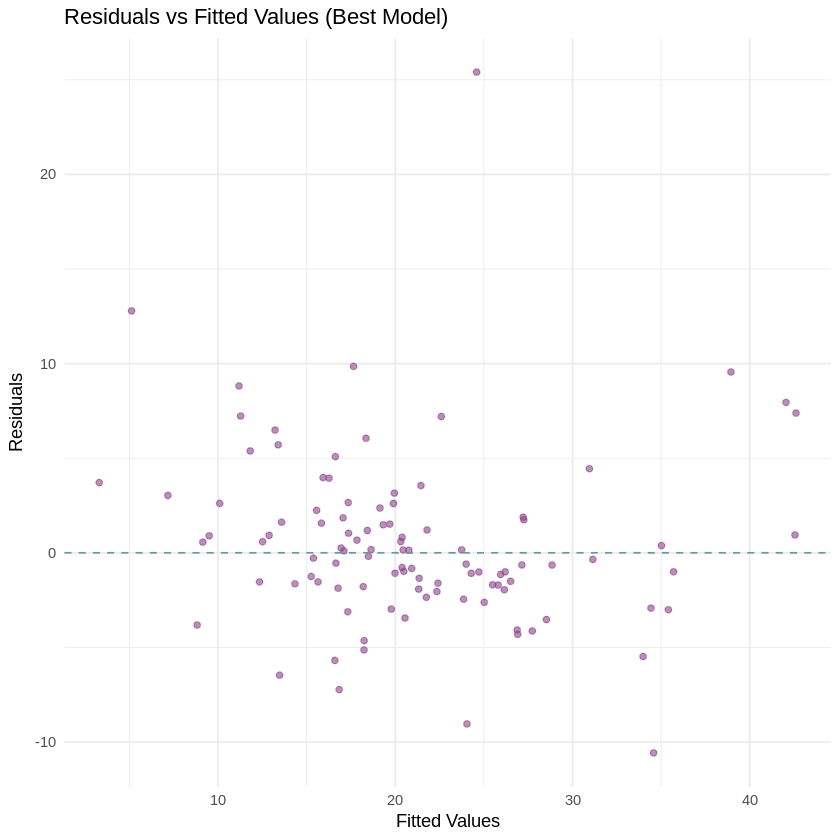

In [ ]:
ggplot() +
  geom_point(aes(x = best_model_predictions, y = residuals_best), color = "orchid4", alpha = 0.6) +
  geom_hline(yintercept = 0, linetype = "dashed", colour = "cadetblue") +
  labs(title = "Residuals vs Fitted Values (Best Model)",
       x = "Fitted Values",
       y = "Residuals") +
  theme_minimal()

The residuals should be randomly scattered around 0.